# Multiclass classification model for handwritten digits with keras
## Autor: Pablo Benayas

In [1]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.datasets import mnist
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
import numpy as np
import time

Using TensorFlow backend.


# Data visualization

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [3]:
print(X_train.shape), print(X_test.shape)
# X_train[0] # color intensity of every pixel (# of pixels = 28*28)

(60000, 28, 28)
(10000, 28, 28)


(None, None)

label for observation 46696: 1
label for observation 24928: 7
label for observation 29885: 4


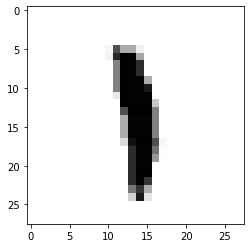

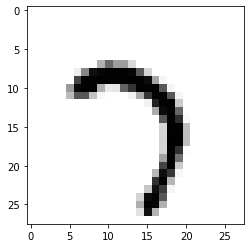

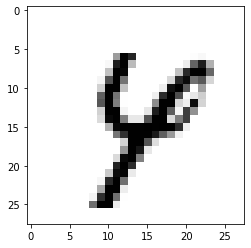

In [4]:
def input_visualization(number):
    plt.figure() 
    print('label for observation {}: {}'.format(number, y_train[number])) 
    plt.imshow(X_train[number], cmap='Greys')

for i in set(np.random.randint(0,len(X_train)-1,3)):
    input_visualization(i)

# Preprocessing

In [5]:
# convert values to float
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

# MinMax scaling -> 
# (pixel's color intesity - max intesity)-(max intensity- min intensity) = (pixel-0)/(255-0) =
# = pixel/255
X_train /= 255 # -> X_train = X_train/255
X_test /= 255

X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

In [6]:
X_train[0].max(), X_train[0].min() 

(1.0, 0.0)

In [7]:
# We have to preprocess labels too
print(y_test.shape)
print(y_test[:5])
set(y_test) 

(10000,)
[7 2 1 0 4]


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
print(y_test[:5]) 

y_test = to_categorical(y_test, len(set(y_test)))
y_train = to_categorical(y_train, len(set(y_train)))
print(y_test.shape)
y_test[:5]

[7 2 1 0 4]
(10000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# We are ready
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [10]:
# X_train=X_train.reshape(60000, 28, 28,1)
X_train.shape

(60000, 28, 28, 1)

# Model

In [11]:
output_shape = y_test.shape[1]

model = Sequential() 
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid',
                 kernel_initializer = glorot_uniform(seed=0), input_shape=[28,28,1]))  
model.add(BatchNormalization(axis = 2)) 
model.add(Activation('relu')) 
model.add(Dense(32, activation='relu'))
model.add(Flatten()) 
model.add(Dense(output_shape, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), 
              metrics = ['categorical_accuracy'])

# Train model

In [13]:
start = time.time()

# model.fit(X_train, y_train, batch_size=512, epochs=1, validation_split=0.1)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', 
                                              patience=1, mode='min')
# if there is no imporvements in validation_loss after 3 epochs, the model stops iterating
# and return the output

training = model.fit(
                        X_train, y_train,
                        epochs = 1,
                        batch_size = 128,
                        validation_split = 0.1,
                        callbacks = [early_stop],
                        shuffle = False, # IMPORTANT: WE DONT WANT TO SHUFFLE OBSERVATIONS BY 
                                         # ANY MEANS. Order matters in time series.
) 

print("> Compilation Time : {} seconds".format(round(time.time() - start, 3))) 

Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - 59s 1ms/sample - loss: 0.1662 - categorical_accuracy: 0.9509 - val_loss: 0.1116 - val_categorical_accuracy: 0.9812
> Compilation Time : 59.178 seconds


# model performance in test set

In [19]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) 
print('Model Loss in test: %.2f, Accuracy in test: %.2f' % ((loss*100, accuracy*100)))

Model Loss in test: 11.75, Accuracy in test: 97.96


# Predictions

In [21]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1) #index position matches predicted label value
label = np.argmax(y_test, axis=1) 

In [23]:
for i in range(5):
    print('Predicted %d---> Expected %d' % (pred[i], label[i]))  

Predicted 7---> Expected 7
Predicted 2---> Expected 2
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 4---> Expected 4


predicted label: [0]
predicted label: [1]
predicted label: [5]


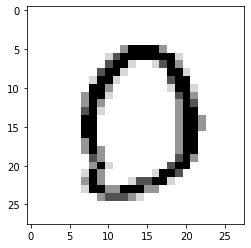

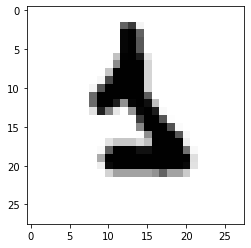

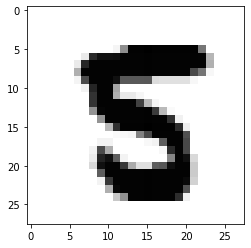

In [30]:

def check_predictions2(number):
    X_test_visualization = X_test.reshape(10000,28,28) 
    plt.figure() 
    pred = model.predict(X_test[number].reshape(1,28,28,1))
    pred = np.argmax(pred, axis=1) #index position matches predicted label value
    print('predicted label: {}'.format(pred)) 
    plt.imshow(X_test[number].reshape(28,28), cmap='Greys')

for i in set(np.random.randint(0,len(X_test)-1,3)):
    check_predictions2(i)